In [4]:
import os

from os.path import exists, join, basename

project_name = "MaskRCNN_TF2"
if not exists(project_name):
  # clone and install
  !git clone -q https://github.com/RahulR432/MaskRCNN_TF2
  ! cd $project_name && pip install -q -r requirements.txt

import sys
sys.path.append(project_name)

In [5]:
import random
import math
import time
import numpy as np
import skimage.io
import tensorflow
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.size']=14
plt.rcParams['axes.grid']=False
%matplotlib inline

In [6]:
# Root directory of the project
ROOT_DIR = os.path.abspath(project_name)

# Import MaskRCNN
sys.path.append(ROOT_DIR) # Local

from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

# Import COCO Config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/")) # Local
import coco

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "log_folder")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")


# /content/Mask_RCNN/mask_rcnn_coco.h5

# Download COCO trained weights from releases if needed
if not os.path.exists(COCO_MODEL_PATH):
  utils.download_trained_weights(COCO_MODEL_PATH)

Using TensorFlow backend.


... done downloading pretrained model!


In [7]:
class InferenceConfig(coco.CocoConfig):
  # Set the batch size to 1 as we will be running inference on 
  # one image at a time; BATCH_SIZE = GPU_COUNT * IMAGES_PER_GPU
  GPU_COUNT = 1
  IMAGES_PER_GPU = 1

config = InferenceConfig()

In [8]:
# Create the model in inference mode

model = modellib.MaskRCNN(mode='inference', model_dir=MODEL_DIR, config=config)

# Load the weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

In [9]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

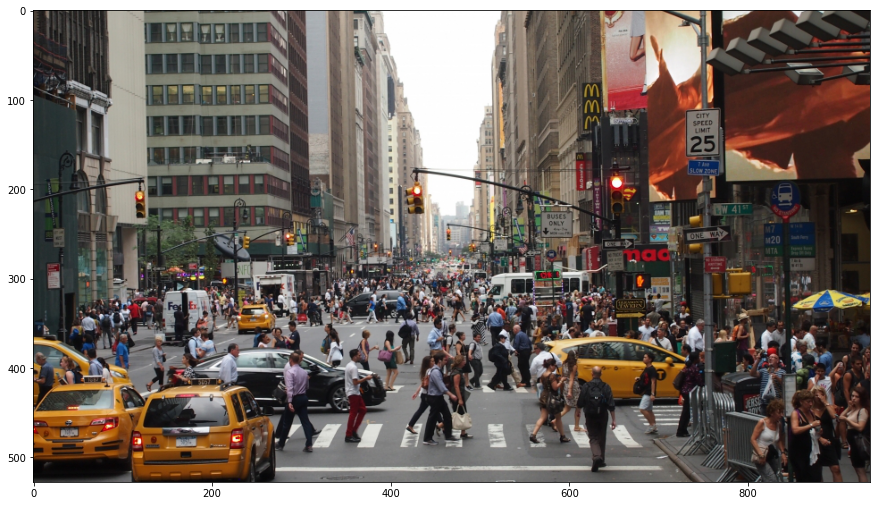

In [10]:
IMAGE_URL =  'https://i.postimg.cc/vBrLC1BF/pedestrian-road-traffic-street-town-city-546336-pxhere-com.jpg'

image_file = basename(IMAGE_URL)
!wget -q -O $image_file $IMAGE_URL
image = skimage.io.imread(image_file)
plt.figure(figsize=(15, 10))
plt.imshow(image)
plt.show()

Processing 1 images
image                    shape: (528, 937, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Executed in 12.997469186782837 seconds


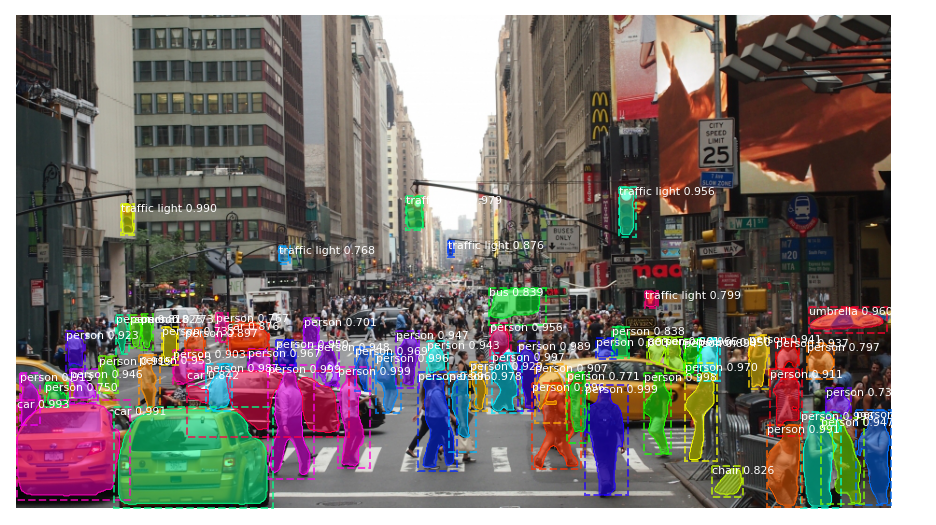

In [11]:
t = time.time()

# Run detection
results = model.detect([image], verbose=1)
print(f"Executed in {time.time()-t} seconds")

# Visualize the results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                           class_names, r['scores'])